<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [8]:
df.loc[df['species']=='VIRGINICA', 'species'] = 'virginica'
df.loc[df['species']==' virginica', 'species'] = 'virginica'
df.loc[df['species']=='virginica ', 'species'] = 'virginica'
df.loc[df['species']=='Versicolor', 'species'] = 'versicolor'
df.loc[df['species']=='VERSICOLOR', 'species'] = 'versicolor'
df.loc[df['species']=='SETOSA', 'species'] = 'setosa'
df.loc[df['species']=='Setosa', 'species'] = 'setosa'
df.loc[df['species'].isnull(),'species'] = 'default'
df['species'].unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

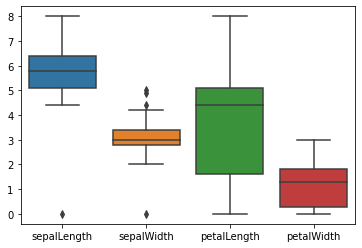

In [31]:
df.columns
#df['sepalLength'].unique() # Tiene valores nan
#df['sepalWidth'].unique() # Tiene valores nan
#df['petalLength'].unique() # Tiene valores nan
#df['petalWidth'].unique() # Tiene valores nan
for col in df.columns:
    df.loc[df[col].isnull(),col] = 0
sns.boxplot(data=df)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [108]:
df.columns
#df.insert(len(df.columns),'label','valor_valido')

df.loc[df['sepalLength'].between(4.0,7.0)==False,'label']='valor_invalido'
df.loc[df['sepalWidth' ].between(2.0,4.5)==False,'label']='valor_invalido'
df.loc[df['petalLength'].between(1.0,7.0)==False,'label']='valor_invalido'
df.loc[df['petalWidth' ].between(0.1,2.5)==False,'label']='valor_invalido'

df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,valor_invalido
1,7.2,3.6,6.1,2.5,virginica,valor_invalido
2,6.3,3.3,6.0,2.5,virginica,valor_valido
3,6.7,3.3,5.7,2.5,virginica,valor_valido
4,6.3,3.4,5.6,2.4,virginica,valor_valido
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,valor_valido
146,4.8,3.0,1.4,0.1,setosa,valor_valido
147,4.9,3.1,1.5,0.1,setosa,valor_valido
148,4.9,3.6,1.4,0.1,setosa,valor_valido


*4. Realice un gráfico de sepalLength vs petalLength y otro de sepalWidth vs petalWidth categorizados por la etiqueta label. Concluya sus resultados.*

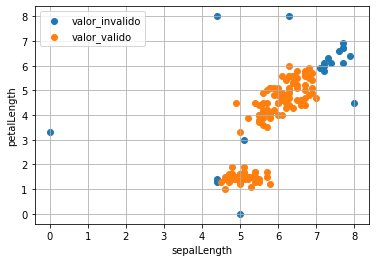

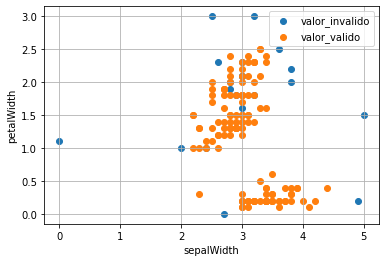

In [119]:
for x_label,y_label in [('sepalLength','petalLength'),('sepalWidth','petalWidth')]:
    fig,ax = plt.subplots()
    for valor in ['valor_invalido', 'valor_valido']:
        x_axis = df.loc[df['label']==valor, x_label]
        y_axis = df.loc[df['label']==valor, y_label]
        ax.scatter(x_axis,y_axis,label=valor)
    ax.legend()
    ax.grid(True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

Text(0, 0.5, 'petalLength')

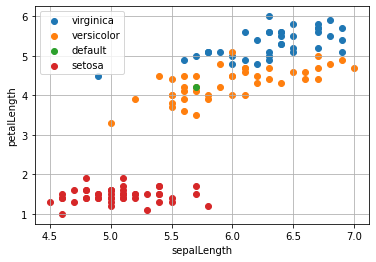

In [128]:
df_aux = df.loc[df['label']=='valor_valido']
fig,ax = plt.subplots()
for specie in df_aux['species'].unique():
    x_axis = df_aux.loc[df_aux['species']==specie, 'sepalLength']
    y_axis = df_aux.loc[df_aux['species']==specie, 'petalLength']
    ax.scatter(x_axis,y_axis,label=specie)
    
ax.legend()
ax.grid(True)

plt.xlabel('sepalLength')
plt.ylabel('petalLength')